## EJERCICIO 1

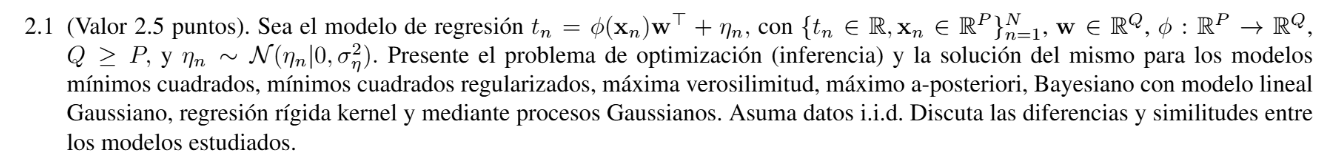

para la solución del ejercicio vamos a ir desglozando cada uno de los problemas de optimización, primero planteamos el problema el cual nos da un modelado inicial como sigue:


$t_n = \phi(\mathbf{x}_n) \mathbf{w}^\top + \eta_n, \; \text{con} \; \{t_n \in \mathbb{R}, \mathbf{x}_n \in \mathbb{R}^P\}_{n=1}^N, \; \mathbf{w} \in \mathbb{R}^Q, \; \phi : \mathbb{R}^P \to \mathbb{R}^Q$

$Q \geq P, \; y \; \eta_n \sim \mathcal{N}(\eta_n | 0, \sigma_\eta^2).$

## MINIMOS CUADRADOS


para iniciar con el planteamiento de optimización partimos de definir una función de error que nos permitira evaluar la diferencia entre nuestros valores inferidos con los valores reales  t_n , esto visto de la siguiente manera:

$  \text{Error} = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2$

Con esa función de error la idea seria minimizar el error, partiendo del hecho de derivar e igualar a cero

llevandolo a la nomenclatura establecida en el problema tendriamos:

$  \sum_{n=1}^N  \left |t_n - \phi(\mathbf{x}_n)^\top \mathbf{w}\right|^2 $

$ \mathbf{t} = (t_{1}, t_{2}, ... , t_{n}) $

$ \Phi = (\phi(\mathbf{x}_1), \phi(\mathbf{x}_2), ... , \phi(\mathbf{x}_n)) $

donde tn seria nuestro vector de datos target, y nuestro t predicho representado por la entrada de nuestros datos , pasada por la función Phi y multiplicada por la matriz de pesos W , cuya matriz es la que debemos obtener para encuentra los valores optimos que resuelvan el problema

ahora trabajando en terminos matriciales, la norma de una matriz al cuadrado se representa como sigue:

 $ |\mathbf{a}\|^2 = \mathbf{a}^\top \mathbf{a} $

por ende nos quedaria

$ \left( \mathbf{t} - \Phi \mathbf{w} \right)^\top \left( \mathbf{t} - \Phi \mathbf{w} \right) $

Ahora distribuyendo la transpuesta y repartiendo el producto matricial tendriamos lo siguiente:

$ \mathbf{t}^\top \mathbf{t} - 2 \mathbf{t}^\top \Phi \mathbf{w} + \mathbf{w}^\top \Phi^\top \Phi \mathbf{w} $


con esto en cuenta procedemos a derivar con respecto a la matriz de pesos, en este caso el primer termino no depende de W se eliminaria de la ecuación y para los otros 2 vamos a partir de las siguientes propiedades

$ \frac{\partial }{\partial{w}} (A^{T}w) = A $ 

$ \frac{\partial }{\partial{w}} (w^TAw) = 2Aw $

por ende tendriamos al final

$ -2 \Phi^\top \mathbf{t} + 2 \Phi^\top \Phi \mathbf{w} $

igualando a cero y despejando W tendriamos 

$ -2 \Phi^\top \mathbf{t} + 2 \Phi^\top \Phi \mathbf{w} = 0 $

$ \Phi^\top \Phi \mathbf{w} = \Phi^\top \mathbf{t} $

$ \mathbf{w} = \left( \Phi^\top \Phi \right)^{-1} \Phi^\top \mathbf{t} $


llegando a la solución analítica, del modelo de minimos cuadrados, el cual nos permite de manera directa hayar la matriz W fija de pesos que optimizan la solución, pero partiendo del hecho de que $ ( \left( \Phi^\top \Phi \right) ) $ debe ser invertible

llevando esto a python tendriamos el siguiente ejemplo

basandonos en la solución planteada vamos a apoyarnos en Chat Gpt para generar una muestra de la solución propuesta mediante el siguiente prompt:

" Dame un ejemplo en python implementando la solución de minimos cuadrados
 con un vector de 10 caracteristicas "

con el cual tenemos el siguiente ejemplo

Pesos reales (w_true): [ 0.34175598  1.87617084  0.95042384 -0.57690366 -0.89841467  0.49191917
 -1.32023321  1.83145877  1.17944012 -0.46917565]
Pesos estimados (w): [-0.21391386  0.58071946  1.52305039  1.39284528 -0.56600899 -0.70934103
  0.37444592 -0.98935134  1.58802222  1.51565628 -0.82541703]


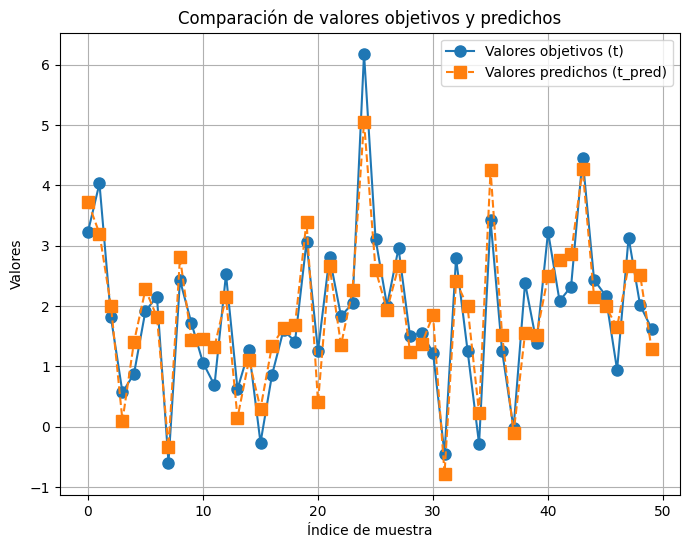

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(42)  # Fijar la semilla para reproducibilidad
n_samples = 50  # Número de muestras
n_features = 10  # Número de características

# Generar la matriz de características (X) y los pesos reales (w_true)
X = np.random.rand(n_samples, n_features)
w_true = np.random.randn(n_features)

# Generar valores objetivos (t) con algo de ruido
t = X @ w_true + np.random.normal(scale=0.5, size=n_samples)

# Resolver por mínimos cuadrados
# Añadir un término de sesgo (columna de unos) a X
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

# Resolver w = (X^T X)^-1 X^T t
w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ t

# Calcular valores predichos
t_pred = X_bias @ w

# Mostrar los pesos reales y los estimados
print("Pesos reales (w_true):", w_true)
print("Pesos estimados (w):", w)

# Graficar los valores objetivos y los predichos
plt.figure(figsize=(8, 6))
plt.plot(range(len(t)), t, 'o-', label="Valores objetivos (t)", markersize=8)
plt.plot(range(len(t_pred)), t_pred, 's--', label="Valores predichos (t_pred)", markersize=8)

plt.title("Comparación de valores objetivos y predichos")
plt.xlabel("Índice de muestra")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()

## MINIMOS CUADRADOS REGULARIZADOS

Para empezar con esta solución como metodo de optimización, partimos de la misma ecuación de minimos cuadrados pero agregando un termino extra asociado a los pesos, como método de penalización para evitar valores de W muy grandes que con lleven el sobre ajuste del modelo planteado. es decir partimos de lo siguiente:

$ \|\mathbf{t} - \boldsymbol{\Phi} \mathbf{w} \|^2 + \lambda \|\mathbf{w}\|^2. $

Donde lo mismo buscamos encontrar los pesos que nos permitan minimar la ecuación de error por ende partimos descomponiento la norma al cuadrado por la multiplicación por las transpuestas quedando de la siguiente manera:

$ \left( \frac{\partial}{\partial \mathbf{w}} \| \mathbf{t} - \boldsymbol{\phi} \mathbf{w} \|^T \| \mathbf{t} - \boldsymbol{\phi} \mathbf{w} \| \right) + 2 \lambda \mathbf{w} $


repartiendo las transpuestas de la misma manera que en la demostración de minimos cuadrados simple

$ -2\phi^T t + 2 \phi^T \phi w + 2\lambda w = 0 $

despejando w tendriamos lo siguiente

$ \omega = \left( \phi^T \phi + \lambda{I} \right)^{-1} \phi^T t $

Podemos ver que aparece un nuevo termino dependiente lambda por la identidad debido a que es una constante y esto tambien me permite suavisar el efecto dado en minimo cuadrados donde una de las condiciones es que :

$ \phi^T \phi  $

sea invertible para encontrar la matriz de pesos W

la regularización busca un equilibrio entre: 

*  Ajustar bien los datos (minimar el error cuadrático)
*  Mantener los pesos pequeños ( minimar $ \|\mathbf{w}\|^2. $ )

El término $ \|\mathbf{w}\|^2. $  penaliza desproporcionadamente los valores grandes de los pesos. Esto signifca que si un peso wi se vuelve muy grande, el término de penalización crece rápidamente , haciendo que la función de costo aumente significativamente. Como resultado, el optimizador evita soluciones donde los pesos W tengan valores grandes.

Ahora vamos a generar un ejemplo donde tengamos encuenta este factor de regularización partiendo del ejemplo anterior, entonces apoyandonos igualmente en chat gpt tendriamos un prompt como sigue:

partiendo de este ejemeplo en python de minimos cuadrados  simple:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) 
n_samples = 50 
n_features = 10 

 Generar la matriz de características (X) y los pesos reales (w_true)
X = np.random.rand(n_samples, n_features)
w_true = np.random.randn(n_features)

 Generar valores objetivos (t) con algo de ruido
t = X @ w_true + np.random.normal(scale=0.5, size=n_samples)

 Resolver por mínimos cuadrados
 Añadir un término de sesgo (columna de unos) a X
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

 Resolver w = (X^T X)^-1 X^T t
w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ t


t_pred = X_bias @ w


print("Pesos reales (w_true):", w_true)
print("Pesos estimados (w):", w)


plt.figure(figsize=(8, 6))
plt.plot(range(len(t)), t, 'o-', label="Valores objetivos (t)", markersize=8)
plt.plot(range(len(t_pred)), t_pred, 's--', label="Valores predichos (t_pred)", markersize=8)

plt.title("Comparación de valores objetivos y predichos")
plt.xlabel("Índice de muestra")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show(); entregame un ejemplo similar donde podamos ver la diferencia pero aplicando minimos cuadrados regularizados

Pesos reales (w_true): [ 0.34175598  1.87617084  0.95042384 -0.57690366 -0.89841467  0.49191917
 -1.32023321  1.83145877  1.17944012 -0.46917565]
Pesos estimados con regularización (w_ridge): [ 0.38559638  1.42395645  1.19713549 -0.48128843 -0.72131166  0.38760699
 -0.69651521  1.28846476  1.15459834 -0.44624232]


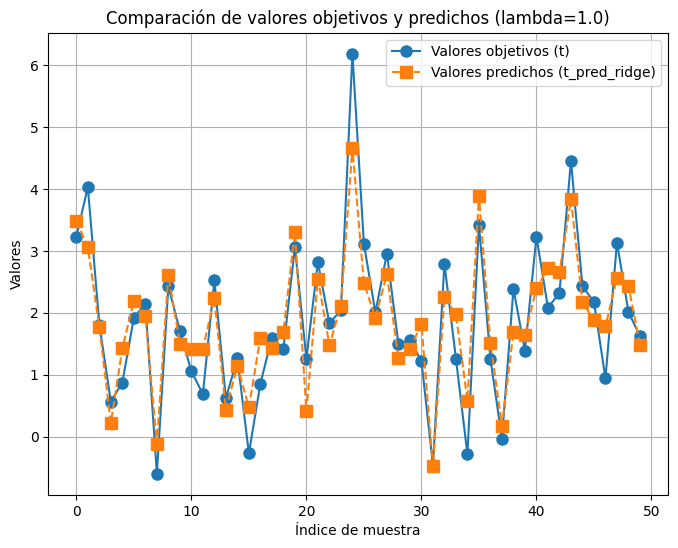

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(42)  # Fijar la semilla para reproducibilidad
n_samples = 50  # Número de muestras
n_features = 10  # Número de características

# Generar la matriz de características (X) y los pesos reales (w_true)
X = np.random.rand(n_samples, n_features)
w_true = np.random.randn(n_features)

# Generar valores objetivos (t) con algo de ruido
t = X @ w_true + np.random.normal(scale=0.5, size=n_samples)

# Parámetro de regularización (lambda)
lmbda = 1.0

# Resolver por mínimos cuadrados regularizados (sin sesgo)
# Resolver w = (X^T X + lambda * I)^-1 X^T t
I = np.eye(X.shape[1])  # Matriz identidad del tamaño adecuado
w_ridge = np.linalg.inv(X.T @ X + lmbda * I) @ X.T @ t

# Calcular valores predichos
t_pred_ridge = X @ w_ridge

# Mostrar los pesos reales y los estimados
print("Pesos reales (w_true):", w_true)
print("Pesos estimados con regularización (w_ridge):", w_ridge)

# Graficar los valores objetivos y los predichos
plt.figure(figsize=(8, 6))
plt.plot(range(len(t)), t, 'o-', label="Valores objetivos (t)", markersize=8)
plt.plot(range(len(t_pred_ridge)), t_pred_ridge, 's--', label="Valores predichos (t_pred_ridge)", markersize=8)

plt.title(f"Comparación de valores objetivos y predichos (lambda={lmbda})")
plt.xlabel("Índice de muestra")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()

## ESTIMADOR POR MAXIMA VEROSIMILITUD

Para empezar a estudiar el siguiente modelado partamos del planteamiento del ejercicio donde tenemos lo siguiente definido


$t_n = \phi(\mathbf{x}_n) \mathbf{w}^\top + \eta_n, \; \text{con} \; \{t_n \in \mathbb{R}, \mathbf{x}_n \in \mathbb{R}^P\}_{n=1}^N, \; \mathbf{w} \in \mathbb{R}^Q, \; \phi : \mathbb{R}^P \to \mathbb{R}^Q$

La idea general que tenemos seria dado unos datos X, queremos encontrar los parámetros w que maximizan la probabilidad de observar la salida requerida, es decir que podemos expresarlos en terminos de una probabilidad, ahora que tipo de probabilidad es la que esta afectando mis datos? , seria una Normal que tiene una ecuación general como sigue:

$  f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

llevandola al caso particular tendriamos que nuestro target o datos de interes serian tn y el valor esperado de esos datos viene dado por la ecuación de mi matriz de caracteristicas por los pesos es decir tendriamos lo siguiente

$ p(t_n|w) = \frac{1}{\sqrt{2\pi\sigma_n^2}} \exp\left(-\frac{(t_n - \phi(X_n)^\top w)^2}{2\sigma_n^2}\right). $

la varianza sigue siendo la del ruido original de mis datos

ahora dado que dentro del planteamineto del problema definimos que mi conjunto de datos es i.i.d , la probabilidad condicional que estamos calculando la podemos definir como el producto de las probabilidades individuales, quedando de la siguiente manera:

$ p(t|w) = \prod_{n=1}^{N} p(t_n|w) = \prod_{n=1}^{N} \frac{1}{\sqrt{2\pi\sigma_n^2}} \exp\left(-\frac{(t_n - \phi(X_n)^\top w)^2}{2\sigma_n^2}\right). $

ahora en lugar de trabajar con la verosimilitud directamente vamos a trabajar con Log-verosimilitud, para simplificar los calculos correspondientes

$ \ln p(t|w) = \sum_{n=1}^{N} \ln \left( \frac{1}{\sqrt{2\pi\sigma_n^2}} \exp\left(-\frac{(t_n - \phi(X_n)^\top w)^2}{2\sigma_n^2}\right) \right). $

Reorganizando la ecuación y repartiendo el logaritmo

$ \ln p(t|w) = -\frac{N}{2} \ln(2\pi\sigma_n^2) - \frac{1}{2\sigma_n^2} \sum_{n=1}^{N} (t_n - \phi(X_n)^\top w)^2. $

ahora el término independiente que tenemos al inicio de la ecuación no depende de W, por lo que no afecta el máximo nos enfocamos en el segundo término y recordemos que podemos trabajar apartir de la minimización pero requerimos invertir el signo por ende tendriamos: 

$ \min_w \sum_{n=1}^{N} (t_n - \phi(X_n)^\top w)^2. $

Cayendo directamente a minimos cuadrados sin regularizar, por ende de aqui podemos concluir que minimos cuadrados no es un sino un caso particular de maxima verosimilitud pero asumiendo ruido blanco gaussiando.

En este caso como caemos a la misma ecuación que minimos cuadrados con lo cual podemos basarnos en el código original

los supuestos claves serian:

*  El ruido es gaussiano con media cero e i.i.d
* La matriz  $ \phi^T \phi  $ , es invertible (no hay multicolinealidad).

## MAXIMA A POSTERIORI (MAP)

En los casos anteriores nos hemos dedicado a encontrar el único  valor que maximiza la verosimilitud , buscamos el valor más probable de los parámetros W dado el conjunto de datos observado t. y teniamos una probabilidad condicional en maxima verosimilitud, ahora esa probabilidad la podemos ver reflejada en el teorema de bayes 

$ p(w|t) \propto p(t|w) \cdot p(w) $

donde

* $ p(t|w) $ : es la verosimilitud de los datos datos el modelo, como en el enfoque de ML.
* $ p(w|t) $ : Es la distribución posterior de los parámetros w, que queremos maximizar y actualizar segun mi verosimilitud y el prior.
* $ p(w) $ : Distribución previa (prior) sobre los parámetros W, que incorpora nuestra información a priori sobre ellos.

El método MAP busca maximizar $ p(w|t) $ apartir de un prior donde se asume lo siguiente con respecto a los pesos:

Se asume un prior sobre los parámetros, asumimois un prior gaussiano sobre los parámetros W , con media 0 y varianza $\lambda^{-1}$  es decir que entre mayor sea $\lambda$ menor varianza por ende los pesos no tendriamos desviaciones grandes sino que se establecerian cercanos  a la media en este caso tendiendo a cero, que nos recuerda mucho al efecto de $\lambda$ en la regularización en minimos cuadrados

$p(w) = \mathcal{N}(w|0, \lambda^{-1}I) = \frac{1}{(2\pi)^{\frac{Q}{2}}|\lambda^{-1}I|^{\frac{1}{2}}} \exp\left(-\frac{\lambda}{2} \|w\|^2\right),$

Realizando el mismo proceso que con la verosimilitud vamos a trabajar con el logaritmo de la probabilidad entonces nos quedaria de la siguiente manera: 

$ \ln p(w) = -\frac{Q}{2} \ln(2\pi) - \frac{\lambda}{2} \|w\|^2. $

ahora podriamos decir en terminos proporcionales que  la probabilidad a priori vendria data por:

$\ln p(w) \propto -\frac{\lambda}{2} \|w\|^2.$

el término penaliza valores grandes de W, lo que introduce la regularización

con respecto a la verosimilitud ya la calculamos previamente entonces sabemos que corresponde a la aproximación de minimos cuadrados teniendo que la probabilidad a posterior vendria dada:

$ \ln p(w|t) = \ln p(t|w) + \ln p(w) $

Sustituyendo con los valores calculados tendriamos

$\ln p(w|t) \propto -\frac{1}{2\sigma^2} \sum_{n=1}^{N} (t_n - \phi(X_n)^\top w)^2 - \frac{\lambda}{2} \|w\|^2. $

Lo cual equivale a minimar la siguiente ecuación

$ \min_w \frac{1}{2\sigma_n^2} \|t - \Phi w\|^2 + \frac{\lambda}{2} \|w\|^2. $

y si nos damos cuante realmente corresponde a la solución por minimos cuadrados regularizados que vimos anteriormente, es decir que podemos de entrada que el parametro de regularización $\lambda$ proviene de la varianza del prior gaussiano definida en los parametros.

Por este lado no vale la pena la simulación del ejercicio puesto que caemos en la misma solución por minimos cuadrados regularización planteada anteriormente en el código de python estipulado.

## MODELO BAYESIANO

Como vimos anteriormente , el método MAP parte del teorema de bayes, y terminando definiendo una aproximación a la probabilidad condicional $p(w|t)$ llegando a la solución de minimos cuadrados regularizados, en el modelamiento bayesiano se amplía el concepto de máxima a posteriori  y obtenemos la distribución posterior completa de los parámetros W, en lugar de solo un valor puntual para los pesos. 

con MAP definimos a partir de bayes lo siguiente: 

$ p(w|t) \propto p(t|w) \cdot p(w) $

Donde ya reemplazando la verosimilitud y la probabilidad a priori de los pesos llegamos puntualmente a lo siguiente

$\ln p(w|t) \propto -\frac{1}{2\sigma^2} \sum_{n=1}^{N} (t_n - \phi(X_n)^\top w)^2 - \frac{\lambda}{2} \|w\|^2. $

En este caso ya no simplicando para llegar a minimos cuadrados sino operando para reorganizar los terminos apartir de la propiedad:

 $ |\mathbf{a}\|^2 = \mathbf{a}^\top \mathbf{a} $ 

tendriamos

$ \ln p(w|t) \propto -\frac{1}{2} \left[ w^\top \left( \frac{1}{\sigma_n^2} \Phi^\top \Phi + \lambda I \right) w - 2w^\top \left( \frac{1}{\sigma_n^2} \Phi^\top t \right) \right]. $

Donde esto corresponde a la forma logaritmica  de una gaussiana por lo tanto podemos asumir que dicha distribución me modela mis pesos, y los valores de media y covarianza al ser multivariado podemos desglozarlos de la misma ecuación quedando entonces:

Matriz de covarianza de la posterior

$S = \left( \frac{1}{\sigma_n^2} \Phi^\top \Phi + \lambda I \right)^{-1}$

Media de la posterior

$m = S \left( \frac{1}{\sigma_n^2} \Phi^\top t \right)$

La media de la posterior (m) coincide con la solución de MAP , sin embargo el enfoque bayesiano proporciona la covarianza (S), lo que permite capturar la incertidumbre en W.

Para este caso vamos a generar un ejemplo partiendo de los ejemplos anteriores de MAP y minimos cuadrados, pero calculando por el modelado bayesiano utilizando las herramientas de lenguaje ampliado aplicando el siguiente prompt:

teniendo encuenta este ejemplo con minimos cuadrados regularizados: import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Fijar la semilla para reproducibilidad
n_samples = 50  # Número de muestras
n_features = 10  # Número de características

X = np.random.rand(n_samples, n_features)
w_true = np.random.randn(n_features)

t = X @ w_true + np.random.normal(scale=0.5, size=n_samples)

lmbda = 1.0


I = np.eye(X.shape[1])  # Matriz identidad del tamaño adecuado
w_ridge = np.linalg.inv(X.T @ X + lmbda * I) @ X.T @ t

t_pred_ridge = X @ w_ridge

print("Pesos reales (w_true):", w_true)
print("Pesos estimados con regularización (w_ridge):", w_ridge)

plt.figure(figsize=(8, 6))
plt.plot(range(len(t)), t, 'o-', label="Valores objetivos (t)", markersize=8)
plt.plot(range(len(t_pred_ridge)), t_pred_ridge, 's--', label="Valores predichos (t_pred_ridge)", markersize=8)

plt.title(f"Comparación de valores objetivos y predichos (lambda={lmbda})")
plt.xlabel("Índice de muestra")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show(); dame un ejemplo similar pero bajo el enfoque de modelo bayesiano donde podamos ver el efecto de tener la distribución posterior y la incertidumbre de los parametros

obtiendo el siguiente resultado:

Pesos reales (w_true): [ 0.34175598  1.87617084  0.95042384 -0.57690366 -0.89841467  0.49191917
 -1.32023321  1.83145877  1.17944012 -0.46917565]
Pesos estimados (media de la posterior) (m_N): [ 0.50160093  1.31454937  1.40794023 -0.57169988 -0.69848538  0.33972362
 -0.72402782  1.27997878  1.37872332 -0.71935816]
Desviación estándar de los pesos (incertidumbre): [0.30374095 0.35258716 0.32329482 0.36345629 0.32655602 0.39138184
 0.3198883  0.36638524 0.33064679 0.34620077]


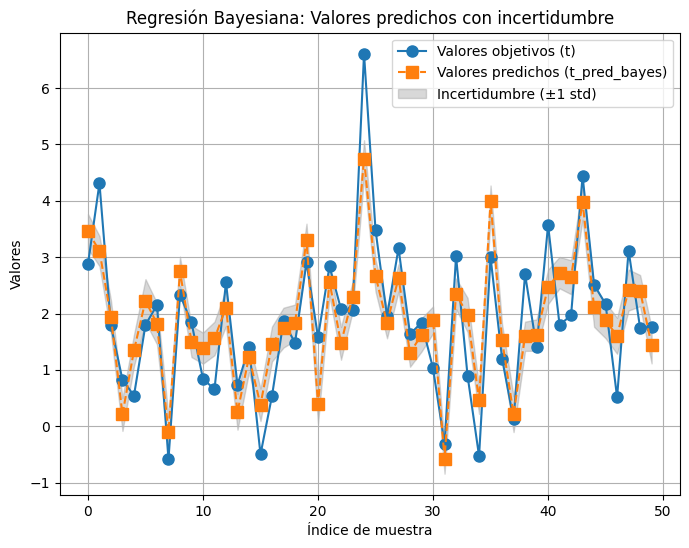

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(42)  # Fijar semilla para reproducibilidad
n_samples = 50      # Número de muestras
n_features = 10     # Número de características

# Generar matriz de características (X) y pesos reales (w_true)
X = np.random.rand(n_samples, n_features)
w_true = np.random.randn(n_features)

# Generar valores objetivos (t) con ruido gaussiano
noise_variance = 0.5
t = X @ w_true + np.random.normal(scale=np.sqrt(noise_variance), size=n_samples)

# Parámetros bayesianos
alpha = 1.0  # Precisión del prior (1 / varianza del prior)
beta = 1.0 / noise_variance  # Precisión del ruido (1 / varianza del ruido)

# Matriz identidad del tamaño adecuado
I = np.eye(n_features)

# Cálculo de la distribución posterior
S_N_inv = alpha * I + beta * (X.T @ X)  # Matriz de precisión de la posterior
S_N = np.linalg.inv(S_N_inv)  # Matriz de covarianza de la posterior
m_N = beta * (S_N @ X.T @ t)  # Media de la posterior

# Generar predicciones con incertidumbre
t_pred_bayes = X @ m_N  # Predicción esperada
t_std = np.sqrt(np.diag(X @ S_N @ X.T))  # Desviación estándar de las predicciones

# Mostrar pesos reales y pesos estimados con incertidumbre
print("Pesos reales (w_true):", w_true)
print("Pesos estimados (media de la posterior) (m_N):", m_N)
print("Desviación estándar de los pesos (incertidumbre):", np.sqrt(np.diag(S_N)))

# Graficar los valores objetivos y las predicciones con incertidumbre
plt.figure(figsize=(8, 6))
plt.plot(range(len(t)), t, 'o-', label="Valores objetivos (t)", markersize=8)
plt.plot(range(len(t_pred_bayes)), t_pred_bayes, 's--', label="Valores predichos (t_pred_bayes)", markersize=8)

# Agregar bandas de incertidumbre (±1 desviación estándar)
plt.fill_between(range(len(t_pred_bayes)),
                 t_pred_bayes - t_std,
                 t_pred_bayes + t_std,
                 color='gray', alpha=0.3, label="Incertidumbre (±1 std)")

plt.title("Regresión Bayesiana: Valores predichos con incertidumbre")
plt.xlabel("Índice de muestra")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()

## KERNEL RIDGE

Para entender este método partamos exclicando en que consiste un kernel, un kernel es una función que mide la similitud entre 2 puntos de datos Xi y Xj, en un espacio de características. En  la regresión con kernel, en lugar de trabajar directamente con los datos originales, usamos una función k(Xi,Xj)  que calcular un producto interno en un espacio de caracteristicas transformado, sin necesidad de calcular explícitamente la transformación.

$ k(X_i, X_j) = \phi(X_i)^\top \phi(X_j) $

¿Por qué?

* Cuando los datos no siguen una relación lineal en el espacio original, podemos mapearlos a un espacio de características de mayor dimensión donde la relación puede ser lineal. Sin embargo, calcular explícitamente esta transformación $\phi (x) $ puede ser costos o incluso imposible si el espacio es de dimensión infinita.  

Con kernels podemos calcular directamente los productos escalares  $  \phi(X_i)^\top \phi(X_j) $ , sin transformar los datos explícitamente

Entonces ya volviendo a la ecuación 

en lugar de resolver para W, podemos reescribirlo en términos de combinaciones lineales de las funciones de base $ \phi (xi)$ :

$ w = \sum_{i=1}^N \alpha_i \phi(X_i). $

al sustitur esto en el modelo de regresión, la predicción de un nuevo punto estaria definida de la siguiente manera:

$\hat{t}_* = \sum_{i=1}^N \alpha_i k(X_i, X_*).$

donde

$ k(X_i, X_j) = \phi(X_i)^\top \phi(X_j) $

Esto significa que en lugar de trabajar con w, solo necesitamos calcular los coeficientes $\alpha$ 

Luego  al elegir el kernel en este caso como estamos hablando de kernel ridge estandar estamos hablando del kernel lineal

$k(\mathbf{X}_i, \mathbf{X}_j) = \mathbf{X}_i^\top \mathbf{X}_j$

la regresión ridge estándar tenia esta forma calculada en los métodos anteriores

$w = (\Phi^\top \Phi + \lambda I)^{-1} \Phi^\top t.$

usando la representación de kernel

$(K + \lambda I) \alpha = t.$

Despejando $\alpha$

$\alpha = (K + \lambda I)^{-1} t.$

Esto nos permite calcular predicciones sin necesidad de conocer explícitamente $\phi (x)$, sino solo usando la matriz del kernel K.

Utilizando el siguiente prompt para generar el ejemplo

"ahora basado en el problema de inicio del chat entregame la solución del problema de optimización por regresión rigida kernel explicada de manera detallada paso a paso, en un código de python"

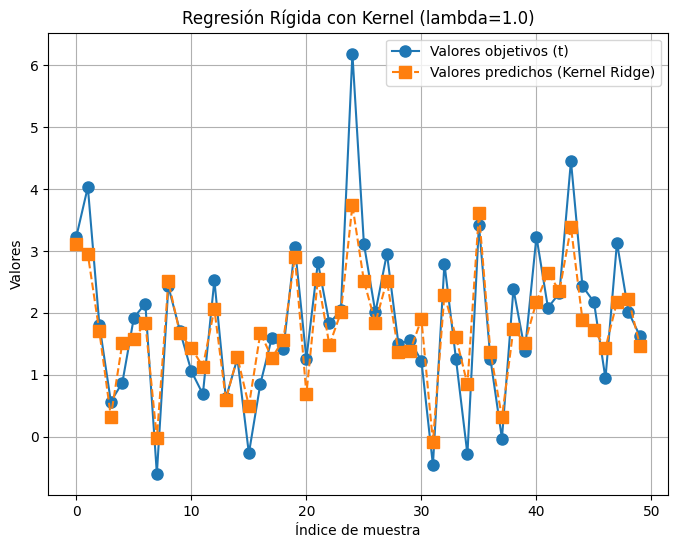

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

# Generar datos sintéticos
np.random.seed(42)
n_samples = 50
n_features = 10

X = np.random.rand(n_samples, n_features)
w_true = np.random.randn(n_features)
t = X @ w_true + np.random.normal(scale=0.5, size=n_samples)

# Definir el kernel RBF
gamma = 0.5  # Parámetro del kernel
K = rbf_kernel(X, X, gamma=gamma)  # Matriz del kernel

# Parámetro de regularización
lambda_param = 1.0

# Resolver el sistema (K + lambda*I)α = t
I = np.eye(n_samples)
alpha = np.linalg.inv(K + lambda_param * I) @ t

# Predicciones
t_pred = K @ alpha

# Mostrar los valores reales y predichos
plt.figure(figsize=(8, 6))
plt.plot(range(len(t)), t, 'o-', label="Valores objetivos (t)", markersize=8)
plt.plot(range(len(t_pred)), t_pred, 's--', label="Valores predichos (Kernel Ridge)", markersize=8)

plt.title(f"Regresión Rígida con Kernel (lambda={lambda_param})")
plt.xlabel("Índice de muestra")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()

## GAUSSIAN PROCESS (GP)

Un proceso gaaussiano es una generalización de la distribución normal multivariante a un número infinito de dimensiones. Se define como:

$f(x) \sim \mathcal{GP}(m(x), k(x, x'))$

Donde:

* $m(x)$ es la función de media del proceso (  usualmente asumida como 0 para simplicidad).
* $k(x,x*)$  es la función kernel o de covarianza que define la correlación entre diferentes puntos de datos.

En regresión con procesos Gaussianos, asumimos que los valores de la función en cualquier conjunto finito de puntos siguen una distribución normal multivariada

El modelo de regresión dado el problema de inicio es:

$t_n = \phi(X_n)^\top w + \eta_n$

El objetivo es encontrar una función $f(x)$ que prediga $t_n$ con incertidumbre. en lugar de estimar un vector de pesos $w$ como en la regresión lineal, en Procesos Gaussianos modelamos directamente la distribución sobre funciones.

Antes de observar los datos, asumimos que la función de salida $f(x)$ sigue un proceso gaussiano con media cero y una matriz de covarianza $K$:

$p(f|X) = \mathcal{N}(0, K)$

donde $K$  es la matriz del kernel, con elementos $K_{ij}= k(x_i,x_j)$ el kernel mide laa similitud entre los puntos de datos y determina qué tan suave o compleja será la función de predicción. 

Ahora implementamos el modelo de Procesos Gaussianos utilizando un kernel Gaussiano (RBF).

c:\Users\death\Doctorado\TAM\venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


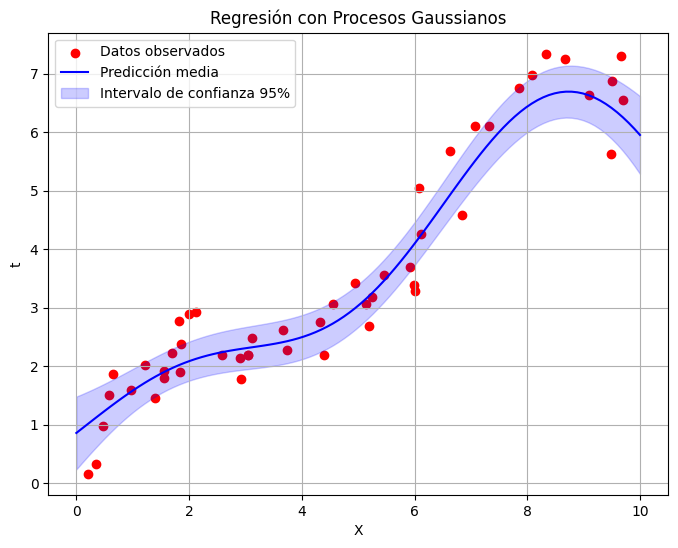

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Generar datos sintéticos
np.random.seed(42)
n_samples = 50
n_features = 1  # Trabajamos con una sola característica para visualización

X = np.random.rand(n_samples, n_features) * 10  # Datos en el rango [0,10]
w_true = np.random.randn(n_features)
t = X @ w_true + np.sin(X).ravel() + np.random.normal(scale=0.5, size=n_samples)  # Función no lineal con ruido

# Definir el kernel (RBF + ruido blanco)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.5)

# Crear y entrenar el modelo de Procesos Gaussianos
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.5)
gp.fit(X, t)

# Puntos para hacer predicciones
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
t_pred, sigma = gp.predict(X_test, return_std=True)  # Media y desviación estándar

# Graficar los datos, predicciones y región de incertidumbre
plt.figure(figsize=(8, 6))
plt.scatter(X, t, c='r', label="Datos observados")
plt.plot(X_test, t_pred, 'b-', label="Predicción media")
plt.fill_between(X_test.ravel(),
                 t_pred - 1.96 * sigma,
                 t_pred + 1.96 * sigma,
                 color='blue', alpha=0.2, label="Intervalo de confianza 95%")

plt.title("Regresión con Procesos Gaussianos")
plt.xlabel("X")
plt.ylabel("t")
plt.legend()
plt.grid(True)
plt.show()
